In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import pickle
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten, Dense, Activation, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,f1_score,classification_report, roc_curve
from tensorflow.keras.optimizers import Adam
 
print("all packages are imported")

all packages are imported


In [3]:
#load training data
X_train=pickle.load(open('X_train.pkl','rb'))
Y_train=pickle.load(open('Y_train.pkl','rb'))

In [4]:
#load test data
X_test=pickle.load(open('X_test.pkl','rb'))
Y_test=pickle.load(open('Y_test.pkl','rb'))

In [5]:
input_size=(196,196)

#Build Model
model = Sequential()

# Layer 1
# apply a 5x5 convolution with 32 output filters on a 196x196 imag
model.add(Convolution2D(32, (5, 5), input_shape=(input_size[0], input_size[1], 3), activation='relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Layer 2
model.add(Convolution2D(32, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))    
model.add(Dropout(0.5))

# Layer 3
model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))    
model.add(Flatten())

# Layer 4
model.add(Dense(1024, activation='relu')) #1024 neurones
model.add(Dropout(0.5))

# Layer 5
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Layer 6
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(2, activation="softmax"))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 192, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0

In [6]:
# Compile the model using Adam Optimizer and Binary Corss-Entropy loss function
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
train_data = np.array(X_train)
print(train_data.shape)
test_data = np.array(X_test)/255  #values to range from 0 to 1
#to_categorical : binary values
train_label = to_categorical(Y_train,dtype='uint8')
test_label = to_categorical(Y_test,dtype='uint8')


(1150, 196, 196, 3)


In [8]:
print('Start training')
model.fit(train_data, train_label, batch_size=10, epochs=5) #batch_size=32


Start training
Train on 1150 samples
Epoch 1/5
1150/1150 [==============================] - 110s 96ms/sample - loss: 0.3558 - accuracy: 0.9765
Epoch 2/5
1150/1150 [==============================] - 80s 69ms/sample - loss: 0.1872 - accuracy: 0.9878
Epoch 3/5
1150/1150 [==============================] - 81s 71ms/sample - loss: 0.2942 - accuracy: 0.9809
Epoch 4/5
1150/1150 [==============================] - 80s 70ms/sample - loss: 0.3210 - accuracy: 0.9791
Epoch 5/5
1150/1150 [==============================] - 79s 68ms/sample - loss: 0.2407 - accuracy: 0.9843


In [19]:
#test accuracy,loss (using test data)
(loss, accuracy) = model.evaluate(test_data,test_label)
print("Test accuracy: {:.2f}%".format(accuracy * 100))


evaluate model
1480/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 58.18%


In [27]:
#prediction and evaluation
pred_label = model.predict(test_data)
 

test_acc=accuracy_score(test_label,pred_label.round())*100
print('the accuracy of the model',test_acc)

c_matrix = confusion_matrix(
    test_label.argmax(axis=1), pred_label.argmax(axis=1))
print('Confusion matrix : \n',c_matrix)


# classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(test_label,pred_label.round(),target_names=["Clear","Blurred"])
print('Classification report : \n',cl_rep)


the accuracy of the model 58.17567567567568
Confusion matrix : 
 [[  0 619]
 [  0 861]]
Classification report : 
               precision    recall  f1-score   support

       Clear       0.00      0.00      0.00       619
     Blurred       0.58      1.00      0.74       861

   micro avg       0.58      0.58      0.58      1480
   macro avg       0.29      0.50      0.37      1480
weighted avg       0.34      0.58      0.43      1480
 samples avg       0.58      0.58      0.58      1480



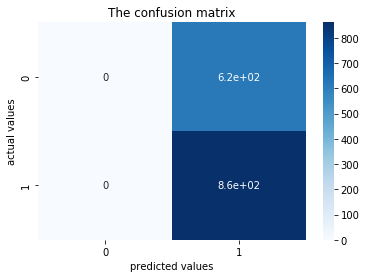

In [16]:
#Confusion Matrix visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(c_matrix, annot=True,cmap='Blues')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [ ]:
#need more data for training
#need balanced data
#should more handle overfitting